## เตรียมข้อมูลก่อนนำไปวิเคราะห์

### แบบบัญชีรายการที่ดิน เทศบาลเมืองลำพูน อำเภอ เมืองลำพูน จังหวัด ลำพูน

#### เปิดไฟล์และทำความสะอาดข้อมูล

In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [63]:
# เปิดไฟล์ csv
df_63 = pd.read_csv("dataset/2563.csv")

# ลบลูกน้ำออก
df_63 = df_63.replace(',','', regex=True)

# เติมค่าว่างตั้งแต่หลักที่ 8 ให้เป็น 0
df_63.iloc[:, 8:] = df_63.iloc[:, 8:].fillna("0")  

# เติมค่าว่างให้เป็น -
df_63 = df_63.fillna("-")  

# แปลงประเภทของข้อมูลให้เป็นตัวเลข
df_63.iloc[:, 8:] = df_63.iloc[:, 8:].astype(float) 

C:\Users\NotOte\AppData\Local\Temp\ipykernel_18752\1831956958.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0          0
1       50.0
2          0
3          0
4          0
       ...  
731    135.3
732    353.9
733    199.2
734    237.4
735    115.4
Name: usage_agriculture, Length: 736, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_63.iloc[:, 8:] = df_63.iloc[:, 8:].fillna("0")
C:\Users\NotOte\AppData\Local\Temp\ipykernel_18752\1831956958.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         0
1         0
2         0
3      82.0
4      81.8
       ... 
731       0
732       0
733       0
734       0
735       0
Name: usage_living, Length: 736, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_63.iloc[:, 8:] = 

In [64]:
# แสดงข้อมูล
df_63

,order,type,document_number,parcel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc
0,1,โฉนด,1526,896.0,1475.0,03A001,0.0,1.0,69.8,0.0,0.0,139.8,0.0,0.0
1,2,โฉนด,1722,897.0,1476.0,03A002,0.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0
2,3,โฉนด,1968,898.0,1506.0,03A003,0.0,0.0,53.0,0.0,0.0,53.0,0.0,0.0
3,4,โฉนด,4043,899.0,2031.0,03A004,0.0,0.0,82.0,0.0,82.0,0.0,0.0,0.0
4,5,โฉนด,1578,901.0,1477.0,03A005,0.0,0.0,81.8,0.0,81.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,732,โฉนด,69648,2.0,4337.0,03H093,0.0,1.0,35.3,135.3,0.0,0.0,135.3,0.0
732,733,โฉนด,30634,2508.0,3560.0,03H094,0.0,3.0,53.9,353.9,0.0,0.0,353.9,0.0
733,734,โฉนด,30549,2507.0,3559.0,03H095,0.0,1.0,99.2,199.2,0.0,0.0,199.2,0.0
734,735,โฉนด,29016,2506.0,3561.0,03H096,0.0,2.0,37.4,237.4,0.0,0.0,237.4,0.0


#### จำแนกลักษณะการทำประโยชน์

In [65]:
# สร้างคอลัมม์ใหม่
df_63["type_of_usage"] = pd.Series([float('NaN')] * len(df_63))

In [66]:
# จำแนกลักษณ์การทำประโยชน์จากพื้นที่ใช้งาน ('พื้นที่ประกอบเกษตรกรรม', 'พื้นที่อยู่อาศัย', 'พื้นที่อื่น ๆ', 'พื้นที่ว่างเปล่า', 'พื้นที่ใช้ประโยชน์หลายประเภท' และ 'ไม่ทราบลักษณะการใช้')
df_63[df_63["usage_agriculture"] > 0] = df_63[df_63["usage_agriculture"] > 0].fillna("agriculture")
df_63[df_63["usage_living"] > 0] = df_63[df_63["usage_living"] > 0].fillna("living")
df_63[df_63["usage_other"] > 0] = df_63[df_63["usage_other"] > 0].fillna("other")
df_63[df_63["usage_none"] > 0] = df_63[df_63["usage_none"] > 0].fillna("wasteland")
df_63[df_63["usage_misc"] > 0] = df_63[df_63["usage_misc"] > 0].fillna("misc")        
df_63["type_of_usage"] = df_63["type_of_usage"].fillna("unknown")

C:\Users\NotOte\AppData\Local\Temp\ipykernel_18752\3692351213.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_63[df_63["usage_agriculture"] > 0] = df_63[df_63["usage_agriculture"] > 0].fillna("agriculture")
C:\Users\NotOte\AppData\Local\Temp\ipykernel_18752\3692351213.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture'

In [67]:
# แสดงข้อมูลโดยจำแนกออกมาแค่ รหัสแปลงที่ดิน และ ลักษณะการใช้ประโยชน์
# พื้นที่ประกอบเกษตรกรรม : agriculture, พื้นที่อยู่อาศัย : living, พื้นที่อื่น ๆ : other, 
# พื้นที่ว่างเปล่า : wasteland, พื้นที่ใช้ประโยชน์หลายประเภท : misc และ ไม่ทราบลักษณะการใช้ : unknown

df_63[ ['location_id', 'type_of_usage'] ]

,location_id,type_of_usage
0,03A001,other
1,03A002,agriculture
2,03A003,other
3,03A004,living
4,03A005,living
...,...,...
731,03H093,agriculture
732,03H094,agriculture
733,03H095,agriculture
734,03H096,agriculture


## วิเคราะห์ข้อมูลและรายงานผล

#### จากแบบบัญชีรายการที่ดิน เทศบาลเมืองลำพูน อำเภอเมือง จังหวัดลำพูน ในปี 2563 มีที่ดิน 736 ที่

In [68]:
land = len(df_63) 
land

736

### ที่ดินสามารถจำแนกจากลักษณะการทำประโยชน์ 6 รายการ ได้แก่ ประกอบการเกษตร, ใช้เพื่ออยู่อาศัย, อื่น ๆ , ไม่ใช้ประโยชน์, ใช้ประโยชน์หลายประเภท และ ไม่ทราบลักษณะการใช้

#### มีพื้นที่ประกอบเกษตรกรรม 30 พื้นที่ คิดเป็น 4.0761 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [69]:
len(df_63[df_63["type_of_usage"] == "agriculture"])

30

In [70]:
(len(df_63[df_63["type_of_usage"] == "agriculture"]) / land) * 100  

4.076086956521739

#### มีพื้นที่อยู่อาศัย 269 พื้นที่ คิดเป็น 36.5489 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน 

In [71]:
len(df_63[df_63["type_of_usage"] == "living"]) 

269

In [72]:
len(df_63[df_63["type_of_usage"] == "living"]) / land * 100

36.54891304347826

#### มีพื้นที่อื่น ๆ 292 พื้นที่ คิดเป็น 39.6739 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [73]:
len(df_63[df_63["type_of_usage"] == "other"])

292

In [74]:
len(df_63[df_63["type_of_usage"] == "other"]) / land * 100

39.67391304347826

#### มีพื้นที่ว่างเปล่า/ไม่ทำประโยชน์ 122 พื้นที่ คิดเป็น 16.5760 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [75]:
len(df_63[df_63["type_of_usage"] == "wasteland"])

122

In [76]:
len(df_63[df_63["type_of_usage"] == "wasteland"]) / land * 100

16.57608695652174

#### และมีพื้นที่ใช้ประโยชน์หลายประเภท 0 พื้นที่ คิดเป็น 0.0 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [77]:
len(df_63[df_63["type_of_usage"] == "misc"])

0

In [78]:
len(df_63[df_63["type_of_usage"] == "misc"]) / land * 100

0.0

#### และมีพื้นที่ไม่ทราบลักษณะการใช้ 23 พื้นที่ คิดเป็น 3.125 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [79]:
len(df_63[df_63["type_of_usage"] == "unknown"])

23

In [80]:
len(df_63[df_63["type_of_usage"] == "unknown"]) / land * 100

3.125

#### จากข้อมูลข้างต้น สามารถนำมาแสดงเป็นแผนภาพได้ดังนี้

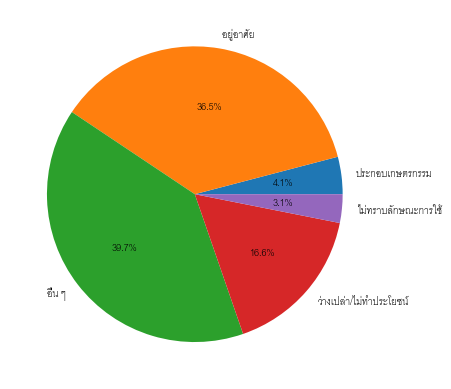

In [81]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "Cordia New"
plt.rcParams["font.serif"] = "Cordia New"

# สร้างกราฟ
data = [ len(df_63[df_63["type_of_usage"] == "agriculture"]),
         len(df_63[df_63["type_of_usage"] == "living"]), 
         len(df_63[df_63["type_of_usage"] == "other"]), 
         len(df_63[df_63["type_of_usage"] == "wasteland"]),
         len(df_63[df_63["type_of_usage"] == "unknown"])
       ]
labels = ['ประกอบเกษตรกรรม','อยู่อาศัย ','อื่น ๆ','ว่างเปล่า/ไม่ทำประโยชน์', 'ไม่ทราบลักษณะการใช้'] 

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

##  ข้อมูลเฉพาะลักษณะการใช้ประโยชน์แบบประกอบเกษตรกรรม

#### ดูข้อมูลทั้งหมด

In [82]:
df_63["type"] = df_63["type"].replace("-", "ไม่ระบุ")
agricultrue_land = df_63[df_63["type_of_usage"] == "agriculture"]
agricultrue_land

,order,type,document_number,parcel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc,type_of_usage
1,2,โฉนด,1722,897.0,1476.0,03A002,0.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0,agriculture
110,111,โฉนด,1401,1273.0,1199.0,03D013,0.0,1.0,52.1,152.1,0.0,0.0,0.0,0.0,agriculture
111,112,โฉนด,27705,1272.0,3504.0,03D013/001,0.0,1.0,61.1,161.1,0.0,0.0,0.0,0.0,agriculture
115,116,โฉนด,1875,1279.0,1193.0,03D015,0.0,2.0,11.1,211.1,0.0,0.0,0.0,0.0,agriculture
123,124,โฉนด,66403,176.0,4117.0,03D019/001,0.0,1.0,65.8,165.8,0.0,0.0,0.0,0.0,agriculture
192,193,โฉนด,782,1333.0,1180.0,03D080,0.0,0.0,72.3,72.3,0.0,0.0,0.0,0.0,agriculture
313,314,โฉนด,784,1384.0,1138.0,03F004,0.0,1.0,42.3,142.3,0.0,0.0,0.0,0.0,agriculture
329,330,โฉนด,26504,1392.0,3439.0,03F011/002,0.0,0.0,87.6,87.6,0.0,0.0,0.0,0.0,agriculture
343,344,โฉนด,28215,1460.0,3548.0,03F017/001,0.0,1.0,22.5,122.5,0.0,0.0,0.0,0.0,agriculture
383,384,โฉนด,1143,1418.0,1172.0,03F043,0.0,1.0,64.2,164.2,0.0,0.0,0.0,0.0,agriculture


#### จำนวนที่ดินที่ประกอบเกษตรกรรม

In [83]:
len(agricultrue_land) # 30 ที่

30

#### ดูข้อมูลทั้งหมดจำแนกแยกด้วยประเภท

In [84]:
df_63.groupby('type').size()

type
น.ส.ล      1
โฉนด     735
dtype: int64

In [85]:
agricultrue_land.groupby('type').size()

# โฉนด 30 ที่

type
โฉนด    30
dtype: int64

#### สามารถดาวน์โหลดไฟล์ csv โดยการนำ '#' ออกและกดรันโปรแกรม

In [86]:
# df_63.to_csv('target/data2563.csv', index=False)

In [87]:
df_63.iloc[:, 8:] = df_63.iloc[:, 8:].replace(0,'-')
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("agriculture", "ประกอบเกษตรกรรม")
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("living", "อยู่อาศัย")
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("other", "อื่น ๆ")
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("wasteland", "ว่างเปล่า/ไม่ทำประโยชน์")
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("misc", "ใช้ประโยชน์หลากหลาย")
df_63.iloc[:, -1] = df_63.iloc[:, -1].replace("unknown", "ไม่ทราบลักษณะการใช้ ")

C:\Users\NotOte\AppData\Local\Temp\ipykernel_18752\999298642.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      69.8
1      50.0
2      53.0
3      82.0
4      81.8
       ... 
731    35.3
732    53.9
733    99.2
734    37.4
735    15.4
Name: tarang_wa, Length: 736, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_63.iloc[:, 8:] = df_63.iloc[:, 8:].replace(0,'-')


In [88]:
df_63 = df_63.rename(columns={
                    "order": "ที่", 
                    "type": "ประเภทที่ดิน", 
                    "document_number": "เลขที่เอกสารสิทธิ์",
                    "parcel_number": "เลขที่ดิน",
                    "sub_district_no" : "หน้าสำรวจ",
                    "location_id" : "รหัสแปลงที่ดิน",
                    "rai" : "ไร่",
                    "ngan" : "งาน",
                    "tarang_wa" : "ตร.ว.",
                    "usage_agriculture" : "ประกอบเกษตรกรรม (ตร.ว.)",
                    "usage_living" : "อยู่อาศัย (ตร.ว.)",
                    "usage_other" : "อื่น ๆ (ตร.ว.)",
                    "usage_none" : "ว่างเปล่า/ไม่ทำประโยชน์ (ตร.ว.)",
                    "usage_misc" : "ใช้ประโยชน์หลากหลาย (ตร.ว.)",
                    "type_of_usage" : "ลักษณะการทำประโยชน์"
                    }, errors="raise")

#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่เกษตรกรรม) โดยการนำ '#' ออกและกดรันโปรแกรม

In [89]:
# df_63[df_63["ลักษณะการทำประโยชน์"] == "ประกอบเกษตรกรรม"].to_csv('../result/พื้นที่ประกอบเกษตรกรรม/2563/พื้นที่ประกอบเกษตรกรรม2563.csv', index=False)

#### สามารถดาวน์โหลดไฟล์ excel โดยการนำ '#' ออกและกดรันโปรแกรม

In [90]:
# df_63[df_63["ลักษณะการทำประโยชน์"] == "ประกอบเกษตรกรรม"].to_excel('../result/พื้นที่ประกอบเกษตรกรรม/2563/พื้นที่ประกอบเกษตรกรรม2563.xlsx', index=False)

------

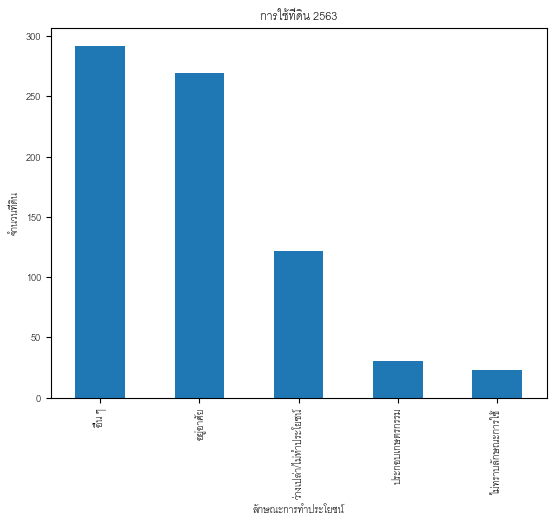

In [91]:
value_counts = df_63["ลักษณะการทำประโยชน์"].value_counts() 
value_counts.plot(kind="bar")
plt.title("การใช้ที่ดิน 2563")
plt.xlabel("ลักษณะการทำประโยชน์")
plt.ylabel("จำนวนที่ดิน")
plt.show()